# Primeiro trabalho de Inferência Estatística.

***Aluno:*** Leonardo Souza

***Professor:*** Eduardo Bezerra.

Neste trabalho foi utilizado Python3==3.7.2, pandas, matplotlib, numpy e notebook. Uma lista com todas as dependências(requerimentos) se encontra no repositório: https://github.com/leomath42/inf_stats


# 1 Estimativas de probabilidades

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Markdown

def show(string):
    return display(Markdown(string))

def gen_table_markdown(size, ans):
    q = list(range(1, size+1))

    qs = ""
   
    for i in q:
        qs = qs + ('| Q%i | %f %% |\n' %(i, ans[i-1])) + '<br/>'
    
    return qs

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

# tabela de dados
df.columns=["age","workclass","finalweight",
            "education","education-num","martial-status",
            "occupation","relationship","race",
            "sex","capital-gain","capital-loss",
            "hours-per-week","native-country","income"
           ]

## box plot da variável Age

/home/mohelot/projetos/statistics/env/lib64/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


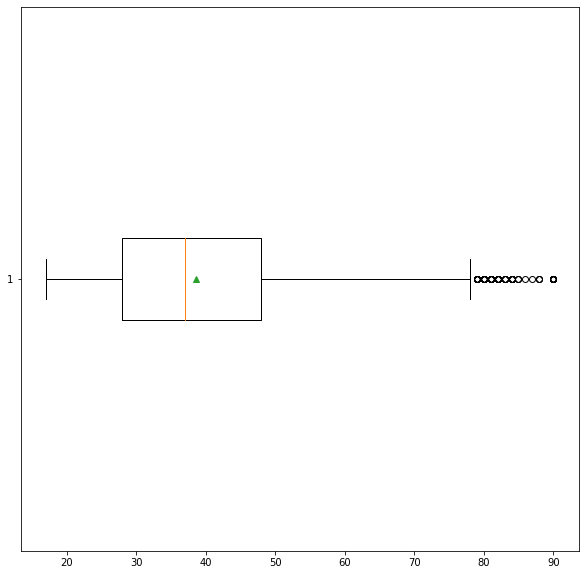

In [3]:
# boxplot dos dados da idade dos usuários.
figure = plt.figure(figsize=(10,10))
plt.boxplot(df['age'], vert=False, showmeans=True, manage_ticks=True)
# adicionar subplot dps para ter uma linha vertial no boxplot para identificar melhor os valores
# de quartils

figure.show()

### (ii)

Dado o gráfico(boxplot) e a tabela(gerada pelo código abaixo), conseguimos identificar que
existem valores(pessoas) outliers por volta dos 78 anos.


In [4]:
import numpy as np
# quartils:
data = [[
    df['age'].quantile(0.25),
    df['age'].quantile(0.5),
    df['age'].quantile(0.75),
    df['age'].mean()
]]
# data = np.array([1, 2])
show("Os valores abaixo representam o Q1, Q2, Q3 (os quantils) e a média respectivamente")
pd.DataFrame(data, columns=["Q1", "Q2", "Q3", "media"])

Os valores abaixo representam o Q1, Q2, Q3 (os quantils) e a média respectivamente

,Q1,Q2,Q3,media
0,28.0,37.0,48.0,38.581634


### (iii)
A tabela a baixo responde os itens seguintes itens:

        Q1. Probabilidade de uma pessoa ter mais de 80 anos dado que a renda seja maior que 50k.
        Q2. Probabilidade de uma pessoa ter mais de 80 anos e renda maior que 50k.
        Q3. Probabilidade de uma pessoa ter ocupação no governo(Workclass = State-gov), 
            trabalhando como adm(Occupation = Adm-clerical) 
            e sendo homem(Sex=male)
        Q4. Probabilidade de ter ocupação no Self-emp-inc, trabalhando como managerial e ser homem

In [5]:

# total de elementos do dataset.
total = df

def probabilidade(x, y, rd=4):
    return round(len(x)/len(y) * 100, rd)

''' Probabilidade de uma pessoa ter mais de 80 anos dado que a renda seja maior que 50k.'''

boolean_salario_maior_que_50k = (df['income'].str.contains('>50K'))
boolean_idade_maior_que_80 = (df['age'] > 80)

# conjunto renda maior que 50k
conj_salario_maior_que_50k = df[boolean_salario_maior_que_50k]

p1 = probabilidade(conj_salario_maior_que_50k[boolean_idade_maior_que_80], conj_salario_maior_que_50k)


# ''' Probabilidade de uma pessoa ter mais de 80 anos e renda maior que 50k.'''
p2 = probabilidade(df[(boolean_idade_maior_que_80) & (boolean_salario_maior_que_50k)], total)

''' Probabilidade de uma pessoa ter ocupação no governo(Workclass = State-gov), 
    trabalhando como adm(Occupation = Adm-clerical) 
    e sendo homem(Sex=male)'''

p3 = probabilidade(df[(df["workclass"].str.contains("State-gov")) & 
        (df["occupation"].str.contains("Adm-clerical")) & 
        (df["sex"].str.contains("Male"))], total)

''' Probabilidade de ter ocupação no Self-emp-inc, trabalhando como managerial e ser homem'''
p4 = probabilidade(df[(df["workclass"].str.contains("Self-emp-inc")) &
        (df["occupation"].str.contains("Exec-managerial")) &
        (df["sex"].str.contains("Male"))], total)

# print(p1,p2,p3,p4)
#Probabilidade da pessoa ter ocupação no gover(State-gov)(Workclass = State-gov, Occupation = Adm-clerical, Sex =
# Pr(W orkclass = State-gov, Occupation = Adm-clerical, Sex =
# Male).

show(pd.Series([str(i) +  " %" for i in [p1, p2, p3, p4]], index=[ 'Q'+str(i) for i in range(1,5)], name="").to_markdown())

/home/mohelot/projetos/statistics/env/lib64/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


|    |          |
|:---|:---------|
| Q1 | 0.1785 % |
| Q2 | 0.043 %  |
| Q3 | 0.2795 % |
| Q4 | 1.0995 % |

# 2    Distribuição Normal

### A tendência é que quanto maior o número de amostras, a probabilidade é que o valor fique mais preciso e se apróxime do valor esperado.
#### As Tabelas abaixo demostram o cálculo para a probabilidade das amostras de 10 e 10k(10000), para cada caso:
    Q1. Pr(μ−σ ≤ x ≤ μ+σ) ≈ 0.683

    Q2. Pr(μ−1.282σ ≤ x ≤μ+ 1.282σ) ≈ 0.8

    Q3. Pr(μ−1.645σ ≤ x ≤ μ+ 1.645σ)≈ 0.9

    Q4. Pr(μ−1.96σ ≤ x ≤ μ+ 1.96σ)≈ 0.95

    Q5. Pr(μ−2σ ≤ x ≤ μ+ 2σ)≈ 0.954

    Q6. Pr(μ−2.57σ ≤ x ≤ μ+ 2.57σ)≈ 0.99

    Q7. Pr(μ−3σ ≤ x ≤ μ+ 3σ)≈ 0.997




In [6]:
from scipy.stats import norm

def gen_sample(sample_size, **kwargs):
    return [norm.rvs(**kwargs) for i in range(sample_size)]

def probability_sample(sample,variance):
    assert variance > 0
    smp  = pd.DataFrame(sample, columns=["X"])
    
    return len(smp[(-1*variance < smp["X"]) & (smp["X"] < variance)]) / len(sample)#sample_size
    
# smp_a_10[smp_a_10 < 1]


sample_10 = gen_sample(10)
sample_10k = gen_sample(10000)

#### Q1. Pr(μ−σ ≤ x ≤ μ+σ) ≈ 0.683

Conseguimos perceber que a ***Pr converge para o valor de 0.683 quando a amostra se apróxima de 10k.***

In [7]:
variance = 1
pd.DataFrame([[probability_sample(sample_10, variance), probability_sample(sample_10k, variance)]], columns=["10", "10K"])

,10,10K
0,0.7,0.683


#### Q2. Pr(μ−1.282σ ≤ x ≤μ+ 1.282σ) ≈ 0.8

A Tabela abaixo demostra o cáculo para a probabilidade das amostras de 10 e 10k(10000).
Conseguimos perceber que a ***Pr converge para o valor de 0.8 quando a amostra se apróxima de 10k.***

In [8]:
variance = 1.282
pd.DataFrame([[probability_sample(sample_10, variance), probability_sample(sample_10k, variance)]], columns=["10", "10K"])

,10,10K
0,0.8,0.7979


#### Q3. Pr(μ−1.645σ ≤ x ≤ μ+ 1.645σ)≈ 0.9
A Tabela abaixo demostra o cáculo para a probabilidade das amostras de 10 e 10k(10000).
Conseguimos perceber que a ***Pr converge para o valor de 0.9 quando a amostra se apróxima de 10k.***

In [9]:
variance = 1.645
pd.DataFrame([[probability_sample(sample_10, variance), probability_sample(sample_10k, variance)]], columns=["10", "10K"])

,10,10K
0,0.9,0.8972


#### Q4. Pr(μ−1.96σ ≤ x ≤ μ+ 1.96σ)≈ 0.95
A Tabela abaixo demostra o cáculo para a probabilidade das amostras de 10 e 10k(10000).
Conseguimos perceber que a ***Pr converge para o valor de 0.95 quando a amostra se apróxima de 10k.***

In [10]:
variance = 1.96
pd.DataFrame([[probability_sample(sample_10, variance), probability_sample(sample_10k, variance)]], columns=["10", "10K"])

,10,10K
0,0.9,0.9508


#### Q5. Pr(μ−2σ ≤ x ≤ μ+ 2σ)≈ 0.954
A Tabela abaixo demostra o cáculo para a probabilidade das amostras de 10 e 10k(10000).
Conseguimos perceber que a ***Pr converge para o valor de 0.954 quando a amostra se apróxima de 10k.***


In [11]:
variance = 2
pd.DataFrame([[probability_sample(sample_10, variance), probability_sample(sample_10k, variance)]], columns=["10", "10K"])

,10,10K
0,0.9,0.9552


#### Q6. Pr(μ−2.57σ ≤ x ≤ μ+ 2.57σ)≈ 0.99
A Tabela abaixo demostra o cáculo para a probabilidade das amostras de 10 e 10k(10000).
Conseguimos perceber que a ***Pr converge para o valor de 0.99 quando a amostra se apróxima de 10k.***

In [12]:
variance = 2.57
pd.DataFrame([[probability_sample(sample_10, variance), probability_sample(sample_10k, variance)]], columns=["10", "10K"])

,10,10K
0,1.0,0.9904


#### Q7. Pr(μ−3σ ≤ x ≤ μ+ 3σ)≈ 0.997
A Tabela abaixo demostra o cáculo para a probabilidade das amostras de 10 e 10k(10000).
Conseguimos perceber que a ***Pr converge para o valor de 0.997 quando a amostra se apróxima de 10k.***

In [13]:
variance = 3
pd.DataFrame([[probability_sample(sample_10, variance), probability_sample(sample_10k, variance)]], columns=["10", "10K"])

,10,10K
0,1.0,0.9973


# 3 Lei dos Grandes Numeros

Os gráficos abaixo demonstram o **experimento da moeda viciada**. 
    
O primeiro gráfico mostra a proporção entre **Cara(0) e Coroa(1)**, que como esperado,
a proporção é de aproximadamente 3 mil elementos quando o resultado é cara e de 7 mil elementos quando o resultado é Coroa.
Já o segundo gráfico mostra a distribuição de 200 amostras(n=50). Podemos perceber que **os valores da média se concentram por volta de 0.7**, pois o valor Esperado é de **E[X] ≈ 0.7**

Já o terceiro gráfico mostra a média acumulada do experimento, podemos perceber que quanto maior o número de elementos a média tende ao valor esperado de **E[X] ≈ 0.7**


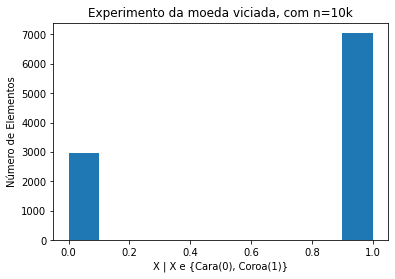

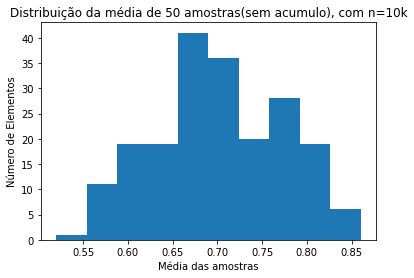

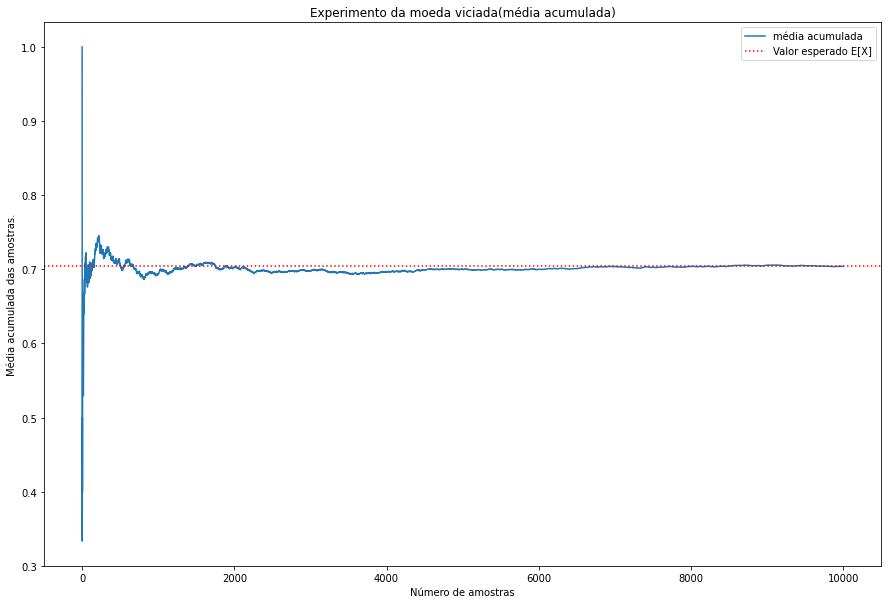

In [14]:
import random
import pandas as pd
from numpy import mean

def biased_coin():
    # 1 == coroa e 0 == cara
    # Pr(X= 0) = 0.3
    return  1 if random.random() > 0.3 else 0


def expected_biased_coin(sample):
    '''
    calcula o valor experado da amostra aleatória do experimento da moeda viciada.
    sample :- list
    '''
#     expected = 0
#     for i, j in list(enumerate(sample)):
#          expected += j*1/len(sample)
    
#     return expected
    return sum(sample) * 1/len(sample)


# gera uma população(amostra gerada aleatóriamente) de tamanho n = 10k
n = 10_000
sample_size = 50
population = [biased_coin() for i in range(n)]

pop_set = pd.DataFrame(population, columns=['X'])

expected_population = expected_biased_coin(population)

expected_samples = []

for i in range(n//sample_size):
    smp = pop_set.sample(n=sample_size)
    e = expected_biased_coin(smp['X'])
    
    expected_samples.append(e)
    
# print(expected_population)
# print(expected_samples)

# Gráfico 1 h = plt.hist(expected_samples) Pr(X= 0) = 0.3
fig, ax = plt.subplots()
ax.set_xlabel('X | X e {Cara(0), Coroa(1)}')
ax.set_ylabel('Número de Elementos')
ax.set_title('Experimento da moeda viciada, com n=10k')
# ax.xaxis = {'minor':0, 'major':1}
ax.hist(population)
plt.show()


# gráfico 2
fig, ax = plt.subplots()
ax.set_xlabel('Média das amostras')
ax.set_ylabel('Número de Elementos')
ax.set_title('Distribuição da média de 50 amostras(sem acumulo), com n=10k')
ax.hist(expected_samples)
plt.show()

# gráfico 3
# media_acumulada = np.transpose(pop_set.cumsum().to_numpy()) / np.array(range(1, 10_001))

# gráfico 3
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('Número de amostras')
ax.set_ylabel('Média acumulada das amostras.')
ax.set_title('Experimento da moeda viciada(média acumulada)')
ax.plot(pop_set.cumsum() / pd.DataFrame(range(1, 10_001), columns=['X']))
ax.axhline(y=expected_population, color='r', linestyle=':')
ax.legend(['média acumulada', 'Valor esperado E[X]'])
plt.show()

# 4    Teorema do Limite Central

O TLC(Teorema do Limite Central) diz que, quanto maior o **n**(número do tamanho das amostras) a tendência é que a **distribuição da média das amostras*** siga a distribuição normal, a variância da mesma seja aproximadamente a variância da população divida pelo tamanho das amostras(**n**) e a média geral das amostras(média da distribuição amostral) será próximo da média da população.

O gráfico e os valores da tabela do experimento abaixo demonstram isso:


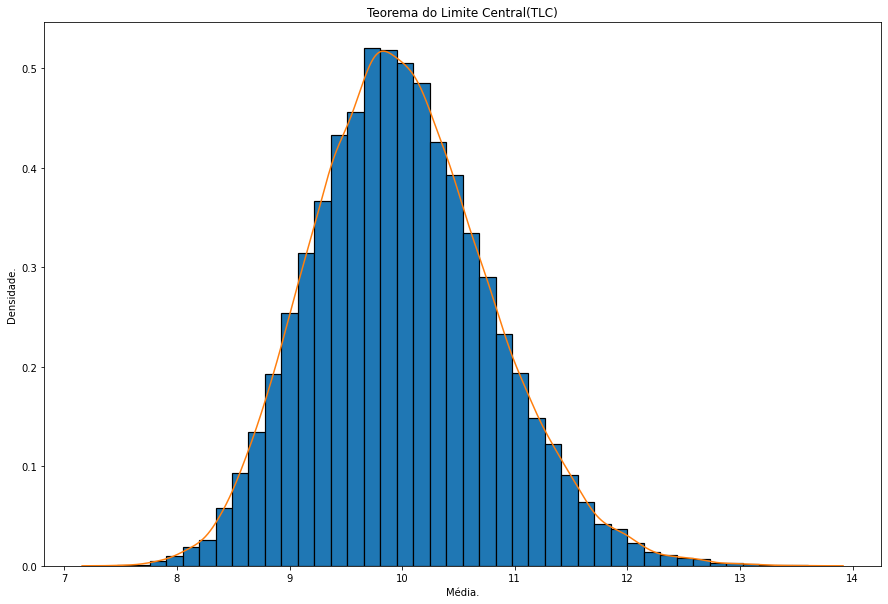

|            |   $$\mu$$ |   $$\sigma^2$$ | $${\sigma^2}/{n}$$   |
|:-----------|----------:|---------------:|:---------------------|
| population |   9.99904 |      24.9627   | -                    |
| sample     |   9.99904 |       0.621314 | 0.6240669642071628   |

In [15]:
from scipy.stats import expon
import scipy.stats as stats
# import seaborn as sns

# scope variables
n = 40
_lambda = 0.2
qtd_sample = 1000
population_size = qtd_sample * n

# population
population = [expon.rvs(size=n, loc=1/_lambda , scale=1/_lambda) for i in range(population_size)]

# samples ( conjunto com 1k de médias amostrais(amostras de n=40).)
l_aux = []
for i in population:
    l_aux.append(np.mean(i))
    #     np.concatenate((samples, np.mean(i)))
samples = np.array(l_aux)

dataseet = samples



######## gráfico TLC ########
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('Média.')
ax.set_ylabel('Densidade.')
ax.set_title('Teorema do Limite Central(TLC)')
ax.hist(dataseet, edgecolor='black', bins=42, linewidth=1.2, density=True)


# min e max do eixo x
min_, max_ = plt.xlim()
# ax.axvline(np.mean(dataseet), color='k', linestyle='dashed', linewidth=1)


# "tendência" Kernel density estimation
kde = stats.gaussian_kde(dataseet)
kde_xs=np.linspace(min_, max_, 10000)
plt.plot(kde_xs, kde.pdf(kde_xs))
plt.show()


population_mean = np.mean(population)
population_var = np.var(population)


sample_mean = np.mean(samples)
sample_var = np.var(samples)

# sns.distplot(dataseet, hist=True, kde=True,
#              bins=16, color = 'c',
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# show(pd.Series([ ], index=[], name="").to_markdown())

show(
    pd.DataFrame(
        [[population_mean,population_var, '-' ], [sample_mean, sample_var, population_var/n]],
        index=['population', 'sample'],
        columns=['$$\mu$$', '$$\sigma^2$$', '$${\sigma^2}/{n}$$']
    ).to_markdown()
)

# 5 Distribuições Amostrais

In [16]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
# from scipy.stats import norm
# import seaborn as sns
# import random
# from scipy.stats import expon


# um saco de batata pode conter de 10 a 20 batatas
# gerando uma população de 800 sacos de batatas.
# saco_batata = range(10, 21)
# np.random.seed(0)
population_size = 1000
sacos = [np.random.randint(10, 21) for _ in range(population_size)]


#### O codigo abaixo responde as **questões i) e ii)**, ele gera o gráfico e uma tabela com a média, variância e o desvio padrão da população de sacos de batatas


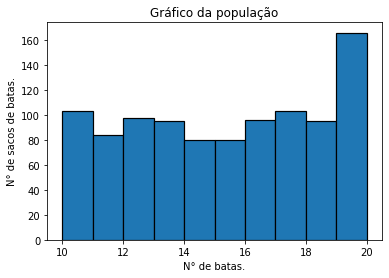

|            |   $$\mu$$ |   $$\sigma^2$$ |   $${\sigma}$$ |
|:-----------|----------:|---------------:|---------------:|
| population |    14.909 |        9.92872 |        3.15099 |

In [17]:
# plota o gráfico(histograma) da população.
fig, ax = plt.subplots()
# ax.hist(sacos)
ax.set_xlabel('N° de batas.')
ax.set_ylabel('N° de sacos de batas.')
ax.set_title('Gráfico da população')
ax.hist(sacos, edgecolor='black', bins=10, linewidth=1.2, density=False)
plt.show()

# tabela com média, variância e o desvio padrão da população de batatas.
mean=np.mean(sacos)
variance=np.var(sacos)
std_deviation = np.std(sacos)

show(
    pd.DataFrame(
        [[mean,variance, std_deviation ]],
        index=['population'],
        columns=['$$\mu$$', '$$\sigma^2$$', '$${\sigma}$$']
    ).to_markdown()
)


#### O codigo abaixo responde as **questões iii) e iv)**, ele gera o gráfico e uma tabela com a média, variância e o desvio padrão das amostras da população de sacos de batatas


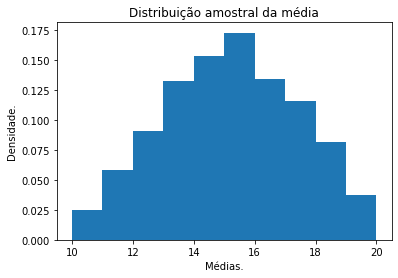

|        |   $$\mu$$ |   $$\sigma^2$$ |   $${\sigma}$$ |
|:-------|----------:|---------------:|---------------:|
| sample |   14.9703 |        4.89849 |        2.21325 |

In [18]:
sample_size = 2
saco_pd = pd.DataFrame(sacos, columns=['X'])

size = population_size*sample_size

samples = [ saco_pd.sample(n=sample_size, replace = True)['X'] for _ in range(size)]
sample_mean = [np.mean(sample) for sample in samples]

sample_mean = np.array(sample_mean)

# print(sample_mean)

# plota o gráfico(histograma) da população.
fig, ax = plt.subplots()
# ax.hist(sacos)
ax.set_xlabel('Médias.')
ax.set_ylabel('Densidade.')
ax.set_title('Distribuição amostral da média')

ax.hist(sample_mean, density=True)
plt.show()

# tabela com média, variância e o desvio padrão da amostra.

mean=np.mean(sample_mean)
variance=np.var(sample_mean)
std_deviation = np.std(sample_mean)

show(
    pd.DataFrame(
        [[mean,variance, std_deviation ]],
        index=['sample'],
        columns=['$$\mu$$', '$$\sigma^2$$', '$${\sigma}$$']
    ).to_markdown()
)


#### v) O ***TLC(Teorema do Limite Central)*** diz que quanto maior o número n de amostras, a tendência é que **os valor de estatística da amostra se assemelhem ao da população**, podemos verificar isso com os resultados das tabelas ods itens **ii) e iv)**. A tabela abaixo mostra o comparativo :

Podemos ver que os valores da amostra e da população se apróximam, além disso a variância da amostra se apróxima do valor da variância da população dividido pelo número de amostras n=2

In [19]:
pop_mean=np.mean(sacos)
pop_variance=np.var(sacos)
pop_std_deviation = np.std(sacos)

smp_mean=np.mean(sample_mean)
smp_variance=np.var(sample_mean)
smp_std_deviation = np.std(sample_mean)

show(
    pd.DataFrame(
        [[pop_mean,pop_variance, pop_std_deviation ,'-' ], 
         [smp_mean, smp_variance, smp_std_deviation, pop_variance/2]],
        index=['population', 'sample'],
        columns=['$$\mu$$', '$$\sigma^2$$', '$${\sigma}$$', '$${\sigma^2}/{n}$$']
    ).to_markdown()
)


|            |   $$\mu$$ |   $$\sigma^2$$ |   $${\sigma}$$ | $${\sigma^2}/{n}$$   |
|:-----------|----------:|---------------:|---------------:|:---------------------|
| population |   14.909  |        9.92872 |        3.15099 | -                    |
| sample     |   14.9703 |        4.89849 |        2.21325 | 4.9643595000000005   |

#### vi) 

    Eu utilizaria a média da população, pois segundo o TLC(Teorema do Limite Central), os valores das estatísticas da amostra e da população tendêm a se apróximar quanto maior o número n de amostras.

    Sim, acho que é um estimador, justamente por causa do TLC.

    Os estimadores possuem a mesma eficácia, a diferença da precisão é o tamanho da amostra.

#### vii) a amplitude da população é 10, ela pode ser encontrada com numpy, o código abaixo demonstra isso:

In [20]:
show("Amplitude é {0}".format(np.max(sacos) - np.min(sacos)))

Amplitude é 10

#### O código abaixo demonstra a questão viii)

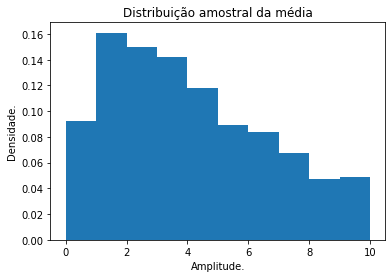

|        |   $$\mu$$ |   $$\sigma^2$$ |   $${\sigma}$$ |
|:-------|----------:|---------------:|---------------:|
| sample |    3.6185 |        6.73696 |        2.59557 |

In [21]:
sample_size = 2
saco_pd = pd.DataFrame(sacos, columns=['X'])

size = population_size*sample_size

samples = [ saco_pd.sample(n=sample_size, replace = True)['X'] for _ in range(size)]
sample_mean = [np.max(sample)-np.min(sample) for sample in samples]

sample_mean = np.array(sample_mean)

# print(sample_mean)

# plota o gráfico(histograma) da população.
fig, ax = plt.subplots()
# ax.hist(sacos)
ax.set_xlabel('Amplitude.')
ax.set_ylabel('Densidade.')
ax.set_title('Distribuição amostral da média')

ax.hist(sample_mean, density=True)
plt.show()

# tabela com média, variância e o desvio padrão da amostra.

mean=np.mean(sample_mean)
variance=np.var(sample_mean)
std_deviation = np.std(sample_mean)

show(
    pd.DataFrame(
        [[mean,variance, std_deviation ]],
        index=['sample'],
        columns=['$$\mu$$', '$$\sigma^2$$', '$${\sigma}$$']
    ).to_markdown()
)



#### ix) De acordo com a questão viii), podemos perceber que os válores da média e da variância estão muito distântes dos valores da estatística da população, logo a amplitude amostral não é um bom estimador.

#### Uma boa abordagem é seguir a ***TLC, assim poderiamos utilizar a regra impírica***, pois a regra impírica diz que a largura da distribuição normal é de $6\sigma$ e isso representa cerca de 99,73% dos valores da distribuição. 
